# 混合正規分布

## 目的
- 混合正規分布のパラメータ推定
- クラス数は既知で2クラス

## データ
- Y : 成績
- N : データ数

## パラメータ
- a : クラス1の確率
- mu : 平均値
- sigma : 分散値

## モデル

- $Y_{n} \sim NormalMixture(y|a,\mu_{1},\mu_{2},\sigma_{1},\sigma_{2})$


In [6]:
%matplotlib inline

In [7]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
stan_code = """
data {
  int N;
  int K;
  vector[N] Y;
}

parameters {
  simplex[K] a;
  ordered[K] mu;
  vector<lower=0>[K] sigma;
  real<lower=0> s_mu;
}

model {
  mu ~normal(mean(Y), s_mu);
  sigma ~ gamma(1.5, 1.0);
  
  for (n in 1:N){
    vector[K] lp;
    for (k in 1:K)
        lp[k] = log(a[k]) + normal_lpdf(Y[n]|mu[k],sigma[k]);
    target += log_sum_exp(lp);
    }
}
"""

In [29]:
df=pd.read_csv("data/data-mix1.txt")

stan_dat = {
    'N': len(df),
    'K':2,
    'Y': df['Y']
}

In [30]:
fit = pystan.stan(model_code = stan_code, data = stan_dat, iter = 2500, chains = 4)
print(fit)

Inference for Stan model: anon_model_562d23bef5ca75a2f2fbb653275d77bc.
4 chains, each with iter=2500; warmup=1250; thin=1; 
post-warmup draws per chain=1250, total post-warmup draws=5000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[0]       0.55  1.9e-3   0.07   0.39   0.51   0.56    0.6   0.67   1378    1.0
a[1]       0.45  1.9e-3   0.07   0.33    0.4   0.44   0.49   0.61   1378    1.0
mu[0]     -0.03  5.0e-3   0.22  -0.46  -0.18  -0.04   0.11   0.41   2013    1.0
mu[1]      5.81    0.02   0.62   4.35   5.47   5.88   6.23   6.81   1587    1.0
sigma[0]   1.29  3.9e-3   0.18   0.98   1.17   1.29    1.4   1.69   2056    1.0
sigma[1]   2.35    0.01   0.43   1.67   2.04   2.29    2.6   3.36   1637    1.0
s_mu       21.1    2.19  99.55   1.91   3.73   6.49  13.19 114.03   2072    1.0
lp__     -253.6    0.05   1.83 -258.2 -254.6 -253.3 -252.3 -251.1   1643    1.0

Samples were drawn using NUTS at Tue Nov 15 22:09:33 2016.
For each parameter, n_eff is a 

In [74]:
ms=fit.extract()
a=np.ms['a']
mu=ms['mu']
sigma=ms['sigma']

(array([ 0.04360465,  0.02180233,  0.10901163,  0.02180233,  0.19622093,
         0.1744186 ,  0.19622093,  0.13081395,  0.15261628,  0.0872093 ,
         0.0872093 ,  0.04360465,  0.04360465,  0.04360465,  0.06540698,
         0.        ,  0.0872093 ,  0.10901163,  0.0872093 ,  0.04360465,
         0.06540698,  0.10901163,  0.04360465,  0.02180233,  0.0872093 ,
         0.02180233,  0.04360465,  0.        ,  0.        ,  0.04360465]),
 array([ -2.95      ,  -2.49133333,  -2.03266667,  -1.574     ,
         -1.11533333,  -0.65666667,  -0.198     ,   0.26066667,
          0.71933333,   1.178     ,   1.63666667,   2.09533333,
          2.554     ,   3.01266667,   3.47133333,   3.93      ,
          4.38866667,   4.84733333,   5.306     ,   5.76466667,
          6.22333333,   6.682     ,   7.14066667,   7.59933333,
          8.058     ,   8.51666667,   8.97533333,   9.434     ,
          9.89266667,  10.35133333,  10.81      ]),
 <a list of 30 Patch objects>)

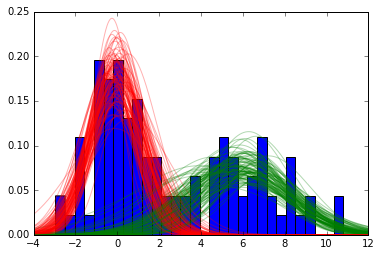

In [82]:
x=np.linspace(-4,12,1000)

stats.norm.pdf(x)
for i in range(100):
    plt.plot(x,a[i,0]*stats.norm.pdf(x,mu[i,0],sigma[i,0]),alpha=0.3,c='r')
    plt.plot(x,a[i,1]*stats.norm.pdf(x,mu[i,1],sigma[i,1]),alpha=0.3,c='g')

plt.hist(df['Y'],bins=30,normed=True)


(array([ 0.04360465,  0.02180233,  0.10901163,  0.02180233,  0.19622093,
         0.1744186 ,  0.19622093,  0.13081395,  0.15261628,  0.0872093 ,
         0.0872093 ,  0.04360465,  0.04360465,  0.04360465,  0.06540698,
         0.        ,  0.0872093 ,  0.10901163,  0.0872093 ,  0.04360465,
         0.06540698,  0.10901163,  0.04360465,  0.02180233,  0.0872093 ,
         0.02180233,  0.04360465,  0.        ,  0.        ,  0.04360465]),
 array([ -2.95      ,  -2.49133333,  -2.03266667,  -1.574     ,
         -1.11533333,  -0.65666667,  -0.198     ,   0.26066667,
          0.71933333,   1.178     ,   1.63666667,   2.09533333,
          2.554     ,   3.01266667,   3.47133333,   3.93      ,
          4.38866667,   4.84733333,   5.306     ,   5.76466667,
          6.22333333,   6.682     ,   7.14066667,   7.59933333,
          8.058     ,   8.51666667,   8.97533333,   9.434     ,
          9.89266667,  10.35133333,  10.81      ]),
 <a list of 30 Patch objects>)

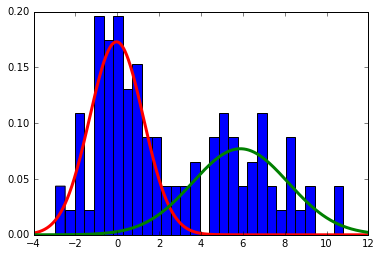

In [81]:
x=np.linspace(-4,12,1000)

stats.norm.pdf(x)
plt.plot(x,np.median(a,axis=0)[0]*stats.norm.pdf(x,np.median(mu,axis=0)[0],np.median(sigma,axis=0)[0]),c='r',linewidth=3)
plt.plot(x,np.median(a,axis=0)[1]*stats.norm.pdf(x,np.median(mu,axis=0)[1],np.median(sigma,axis=0)[1]),c='g',linewidth=3)

plt.hist(df['Y'],bins=30,normed=True)